In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
from scipy import signal

In [17]:
def show_wavelet_spectrograph(cwtmatr, t_range=(0, 1)):
    amp_max = abs(cwtmatr).max()
    plt.imshow(cwtmatr, extent=[t_range[0], t_range[1], 1, len(cwtmatr)+1], cmap='PRGn', aspect='auto',
               vmax=amp_max, vmin=-amp_max)

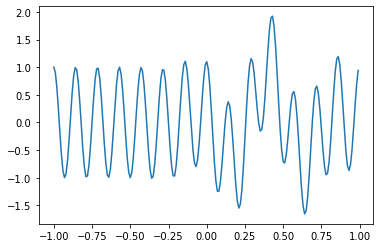

In [1]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
plt.plot(t, sig)

In [31]:
pywt.wavelist(kind="continuous")

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [54]:
wavelet_type = "mexh"
#wavelet_type = "shan"
#wavelet_type = "gaus1"
wav = pywt.ContinuousWavelet(wavelet_type)

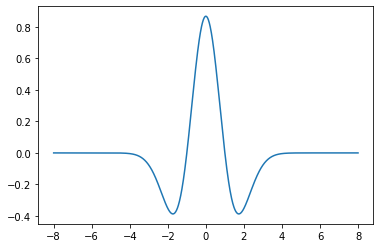

In [74]:
resolution = 2**10
psi, x = wav.wavefun(level=1, length=resolution)
plt.plot(x, psi);

In [84]:
# number of points per length 1
points_per_unit = resolution / (wav.upper_bound - wav.lower_bound)
assert abs(points_per_unit - int(points_per_unit)) < 1e-3
points_per_unit = int(points_per_unit)
points_per_unit

64

int_psi, x = pywt.integrate_wavelet(wav, precision=12)
plt.plot(x, int_psi);

In [145]:
widths = np.arange(1, 33)

cwtmatr, freqs = pywt.cwt(sig, widths, wavelet_type)
cwtmatr_scipy = signal.cwt(sig, signal.ricker, widths)

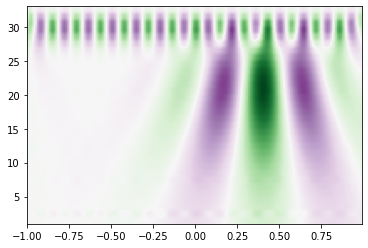

In [146]:
show_wavelet_spectrograph(cwtmatr, t_range=(t[0], t[-1]))

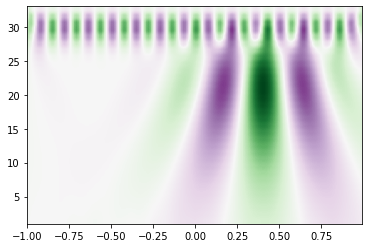

In [163]:
show_wavelet_spectrograph(cwtmatr_scipy, t_range=(t[0], t[-1]))

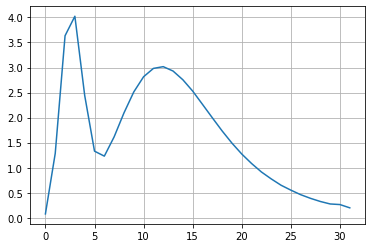

In [281]:
plt.grid(True)
plt.plot( (cwtmatr**2).mean(axis=1) );

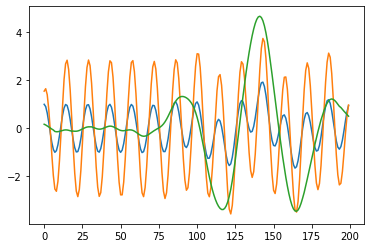

In [283]:
plt.plot(sig);
plt.plot(cwtmatr[3,:]);
plt.plot(cwtmatr[12,:]);

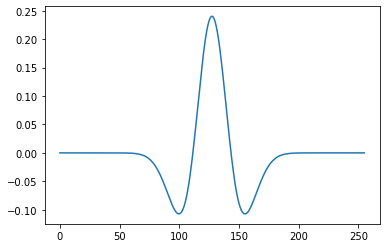

In [172]:
def generate_wavelet(scale):
    global points_per_unit, psi
    points = points_per_unit // scale
    psi_ = scale ** -0.5 * psi[points//2::points]
    return psi_

scale = 13
psi_ = generate_wavelet(scale)
plt.plot(psi_)

In [173]:
# scale nのwaveletは、n * (wav.upper - wav.lower) = nK点の折れ線として表示され、畳み込まれる(全幅がnK点からなる畳み込み)
# 信号 K点分で1スケール単位

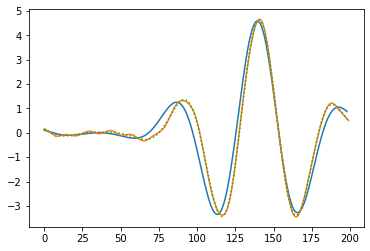

In [174]:
sig_conv = np.convolve(sig, psi_)
plt.plot(sig_conv[len(psi_)//2 : -len(psi_)//2]);
plt.plot(cwtmatr[scale-1]);
plt.plot(cwtmatr_scipy[scale-1], ls=":");

In [201]:
pywt.wavelist(kind="discrete")

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

In [202]:
#sig_dis = 8*[1]
sig_dis = list(range(8))
(cA, cD) = pywt.dwt(sig_dis, 'haar')

cA, cD

(array([0.70710678, 3.53553391, 6.36396103, 9.19238816]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678]))

In [214]:
sig_ = sig_dis
for lv in range(1,4):
    sig_ = [ (sig_[2*i] + sig_[2*i+1])/2 for i in range(len(sig_)//2) ]
    print(sig_)
    print([s*(2**(lv/2)) for s in sig_])

[0.5, 2.5, 4.5, 6.5]
[0.7071067811865476, 3.5355339059327378, 6.3639610306789285, 9.19238815542512]
[1.5, 5.5]
[3.0, 11.0]
[3.5]
[9.899494936611665]


In [210]:
#sig_dis = 8*[1]
sig_dis = list(range(8))
for lv in range(1, 4):
    print("Level:", lv)
    res = pywt.wavedec(sig_dis, 'haar', level=lv)
    print(res)
    print(20*"-")
    #print(f"Lv{lv} approximation:", cA)
    #print(f"Lv{lv} detail:", cD)

Level: 1
[array([0.70710678, 3.53553391, 6.36396103, 9.19238816]), array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]
--------------------
Level: 2
[array([ 3., 11.]), array([-2., -2.]), array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]
--------------------
Level: 3
[array([9.89949494]), array([-5.65685425]), array([-2., -2.]), array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]
--------------------


In [222]:
import copy

In [254]:
#wavelet_dis_type = "haar"
wavelet_dis_type = "db5"

mra_res = pywt.wavedec(sig, wavelet_dis_type, level=4)
sig_rec = pywt.waverec(mra_res, wavelet_dis_type)

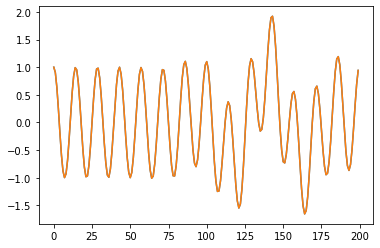

In [255]:
plt.plot(sig);
plt.plot(sig_rec);

In [256]:
sig_components = []
for i, m in enumerate(mra_res):
    mra_comp = [ np.zeros_like(r) for r in mra_res ]
    mra_comp[i] = m
    sig_comp = pywt.waverec(mra_comp, wavelet_dis_type)
    sig_components.append(sig_comp)

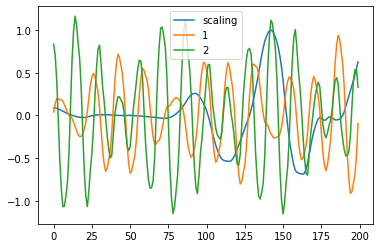

In [257]:
plt.plot(sig_components[0], label="scaling");
for lv, s in enumerate(sig_components[1:3], start=1):
    plt.plot(s, label=lv);
plt.legend();

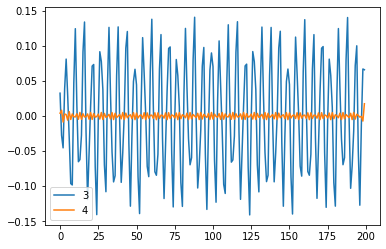

In [258]:
for lv, s in enumerate(sig_components[3:6], start=3):
    plt.plot(s, label=lv);
plt.legend();

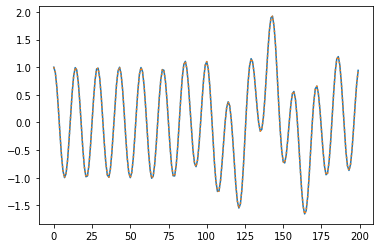

In [259]:
sig_sum = np.array(sig_components).sum(axis=0)
plt.plot(sig);
plt.plot(sig_sum, ls=":");

In [231]:
mra_removed = [ np.zeros_like(r) for r in mra_res ]
mra_res_ = copy.deepcopy(mra_res)
mra_removed[-1] = mra_res_[-1]
mra_res_[-1] = np.zeros_like(mra_res_[-1])
sig_high_removed = pywt.waverec(mra_res_, wavelet_dis_type)
sig_high_comp = pywt.waverec(mra_removed, wavelet_dis_type)

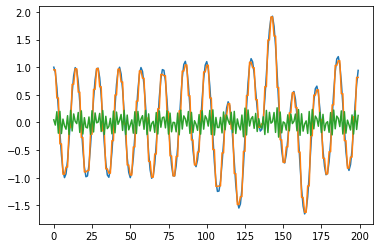

In [232]:
plt.plot(sig);
plt.plot(sig_high_removed);
plt.plot(sig_high_comp);

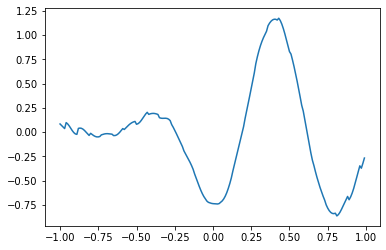

In [21]:
plt.plot(t, cwtmatr[-1]);

## STFT

In [276]:
fs = 10
nperseg = 20
f_, t_, Zxx_ = signal.stft(sig, fs=fs, nperseg=nperseg)

In [277]:
f_

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [278]:
t_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

/home/noriaki/.local/share/virtualenvs/kaggle_torch-NXzETmhk/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


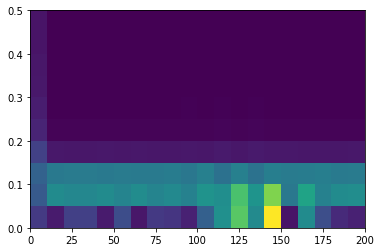

In [271]:
plt.pcolormesh(t_, f_, np.abs(Zxx_))

/home/noriaki/.local/share/virtualenvs/kaggle_torch-NXzETmhk/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


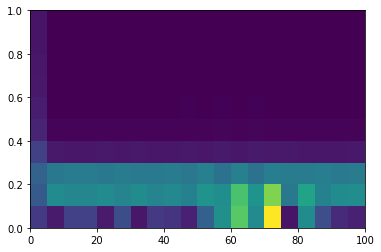

In [275]:
plt.pcolormesh(t_, f_, np.abs(Zxx_))

/home/noriaki/.local/share/virtualenvs/kaggle_torch-NXzETmhk/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


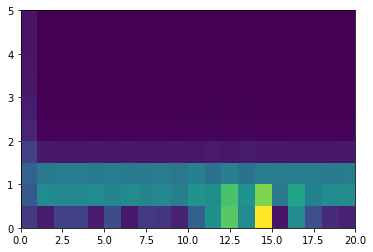

In [279]:
plt.pcolormesh(t_, f_, np.abs(Zxx_))